# 🏢 Apartment Analytics Project
This project simulates the daily responsibilities of a data analyst at a real estate company. Collected, cleaned, analyzed, and reported on simulated property data.

## 1. 📥 Load and View Data
Load the provided datasets: Property Info, Rent Roll, Expenses, Leasing Funnel, and Market Comparables.

In [17]:
# Load datasets
import pandas as pd

property_info = pd.read_csv("data/property_info.csv")
rent_roll = pd.read_csv("data/rent_roll.csv")
expenses = pd.read_csv("data/expenses.csv")
leasing_funnel = pd.read_csv("data/leasing_funnel.csv")
market_comps = pd.read_csv("data/market_comparables.csv")

# Optional: peek at the data
property_info.head()

,Property_ID,Property_Name,Location,Units,Year_Built
0,P001,Wilson Group,"Port Victoria, PA",152,1988
1,P002,Smith-Hall,"Carterberg, FL",229,1992
2,P003,"Kelly, Lowery and Randolph","New Connor, TX",142,1980
3,P004,"Anderson, Davis and West","West Dennis, GA",64,1980
4,P005,Wilkerson Ltd,"New Johnside, NC",156,1993


## 2. 🧹 Data Cleaning
Clean and prepare your data (e.g., fix date formats, handle missing values, remove duplicates).

In [18]:
# 1. Convert date columns to datetime format
rent_roll["Lease_Start"] = pd.to_datetime(rent_roll["Lease_Start"])
rent_roll["Lease_End"] = pd.to_datetime(rent_roll["Lease_End"])
expenses["Date"] = pd.to_datetime(expenses["Date"])
leasing_funnel["Inquiry_Date"] = pd.to_datetime(leasing_funnel["Inquiry_Date"])

# 2. Ensure Rent, Concession, and Amount are numeric
rent_roll["Rent"] = pd.to_numeric(rent_roll["Rent"], errors="coerce")
rent_roll["Concession"] = pd.to_numeric(rent_roll["Concession"], errors="coerce")
expenses["Amount"] = pd.to_numeric(expenses["Amount"], errors="coerce")

# 3. Check for missing values
print("Missing values in Rent Roll:\n", rent_roll.isnull().sum())
print("\nMissing values in Expenses:\n", expenses.isnull().sum())
print("\nMissing values in Leasing Funnel:\n", leasing_funnel.isnull().sum())

# 4. Drop rows with missing critical fields
rent_roll.dropna(subset=["Rent", "Lease_Start", "Lease_End"], inplace=True)
expenses.dropna(subset=["Amount", "Date"], inplace=True)
leasing_funnel.dropna(subset=["Inquiry_Date"], inplace=True)

# 5. Remove duplicates
rent_roll.drop_duplicates(inplace=True)
expenses.drop_duplicates(inplace=True)
leasing_funnel.drop_duplicates(inplace=True)

print("\n✅ Data cleaning complete.")

Missing values in Rent Roll:
 Property_ID         0
Unit_ID             0
Lease_Start         0
Lease_End           0
Rent                0
Concession          0
Occupancy_Status    0
dtype: int64

Missing values in Expenses:
 Property_ID     0
Date            0
Expense_Type    0
Amount          0
Description     0
dtype: int64

Missing values in Leasing Funnel:
 Lead_ID         0
Property_ID     0
Inquiry_Date    0
Lead_Source     0
Toured          0
Lease_Signed    0
dtype: int64

✅ Data cleaning complete.


## 3. 📊 Rent and Occupancy Analysis
Calculate key performance metrics like average rent, occupancy rate, and total revenue per property.

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/3640740780.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rent.values, y=avg_rent.index, palette="Blues_r")


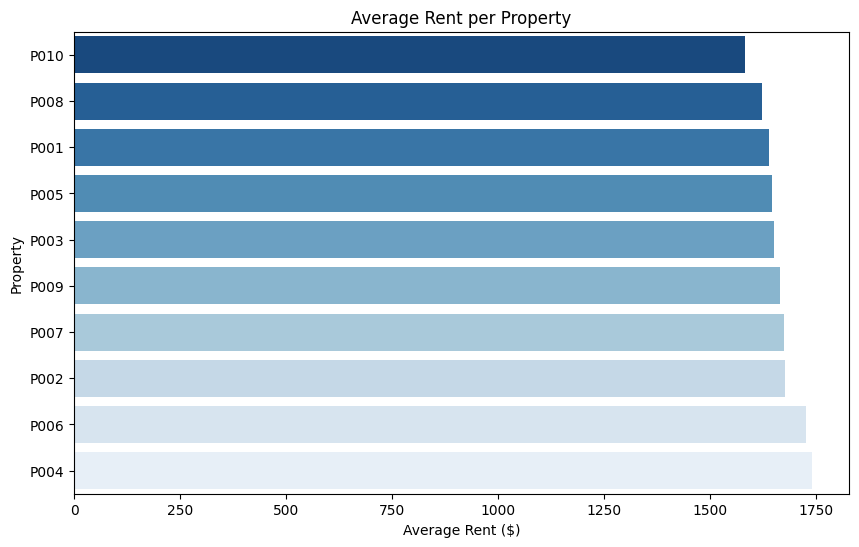

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/3640740780.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_rent.values, y=total_rent.index, palette="Greens_r")


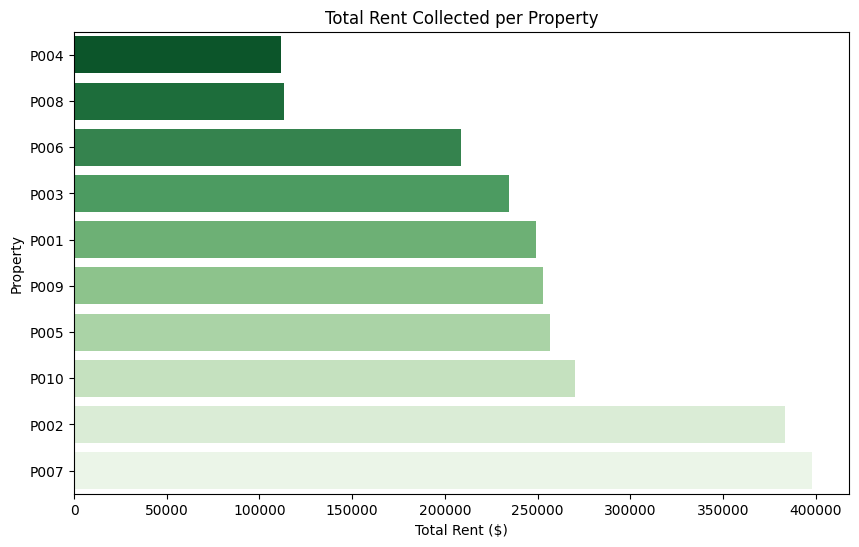

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/3640740780.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupancy["Occupancy_Rate"].values, y=occupancy.index, palette="Purples_r")


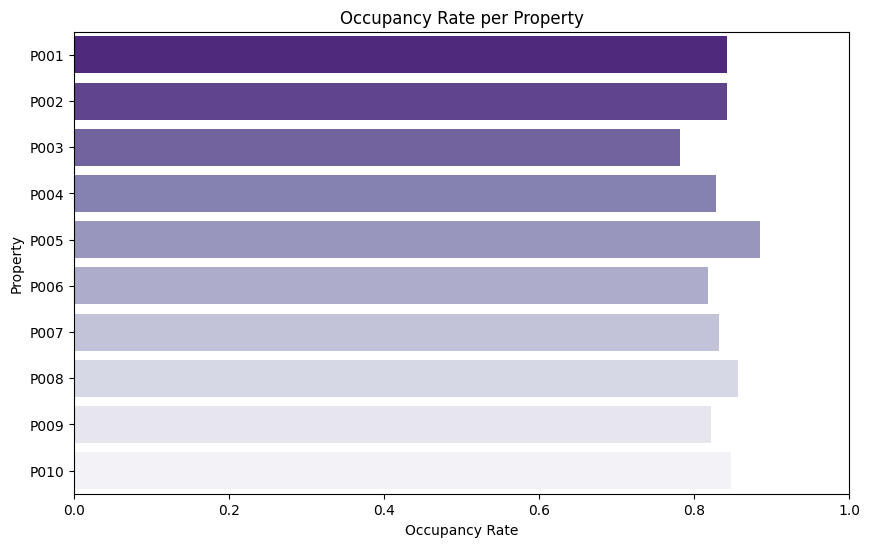

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/3640740780.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=concession_loss.values, y=concession_loss.index, palette="Reds_r")


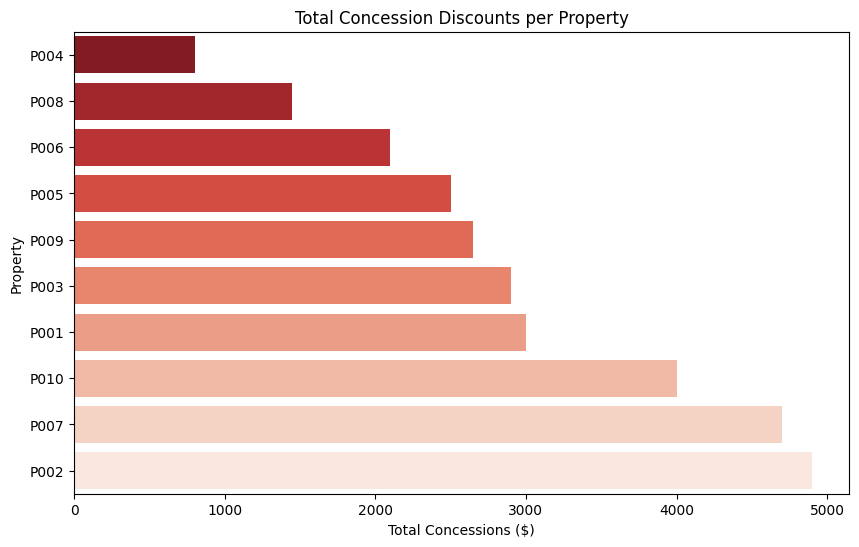

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average Rent by Property
avg_rent = rent_roll.groupby("Property_ID")["Rent"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rent.values, y=avg_rent.index, palette="Blues_r")
plt.title("Average Rent per Property")
plt.xlabel("Average Rent ($)")
plt.ylabel("Property")
plt.savefig("outputs/avg_rent_per_property.png") 
plt.show()

# Total Rent Collected per Property
total_rent = rent_roll.groupby("Property_ID")["Rent"].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_rent.values, y=total_rent.index, palette="Greens_r")
plt.title("Total Rent Collected per Property")
plt.xlabel("Total Rent ($)")
plt.ylabel("Property")
plt.savefig("outputs/total_rent_per_property.png")  
plt.show()

# Occupancy Rate per Property
occupancy = rent_roll.groupby("Property_ID")["Occupancy_Status"].value_counts().unstack().fillna(0)
occupancy["Occupancy_Rate"] = occupancy["Occupied"] / (occupancy["Occupied"] + occupancy["Vacant"])

plt.figure(figsize=(10, 6))
sns.barplot(x=occupancy["Occupancy_Rate"].values, y=occupancy.index, palette="Purples_r")
plt.title("Occupancy Rate per Property")
plt.xlabel("Occupancy Rate")
plt.ylabel("Property")
plt.xlim(0, 1)
plt.savefig("outputs/occ_rate_per_property.png")  
plt.show()

# Revenue Lost to Concessions per Property
concession_loss = rent_roll.groupby("Property_ID")["Concession"].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=concession_loss.values, y=concession_loss.index, palette="Reds_r")
plt.title("Total Concession Discounts per Property")
plt.xlabel("Total Concessions ($)")
plt.ylabel("Property")
plt.savefig("outputs/rev_lost_per_property.png") 
plt.show()

## 4. 💸 Expense Analysis
Analyze expenses by category and property. Identify areas with high operational costs.

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/1872898866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_expenses.values, y=total_expenses.index, palette="Oranges_r")


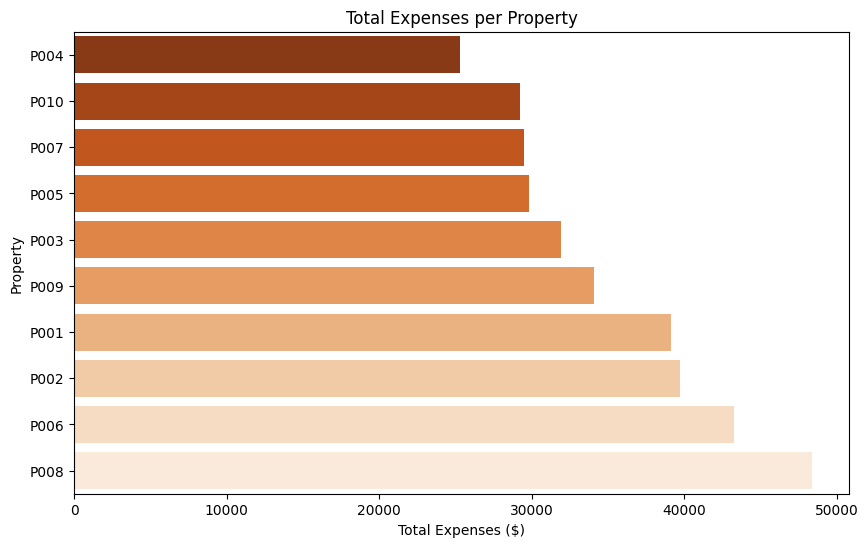

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/1872898866.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=expense_types.values, y=expense_types.index, palette="coolwarm")


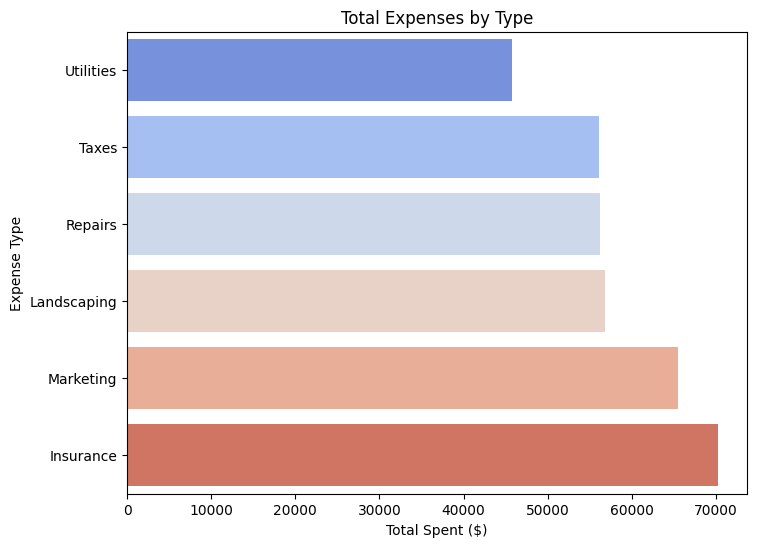

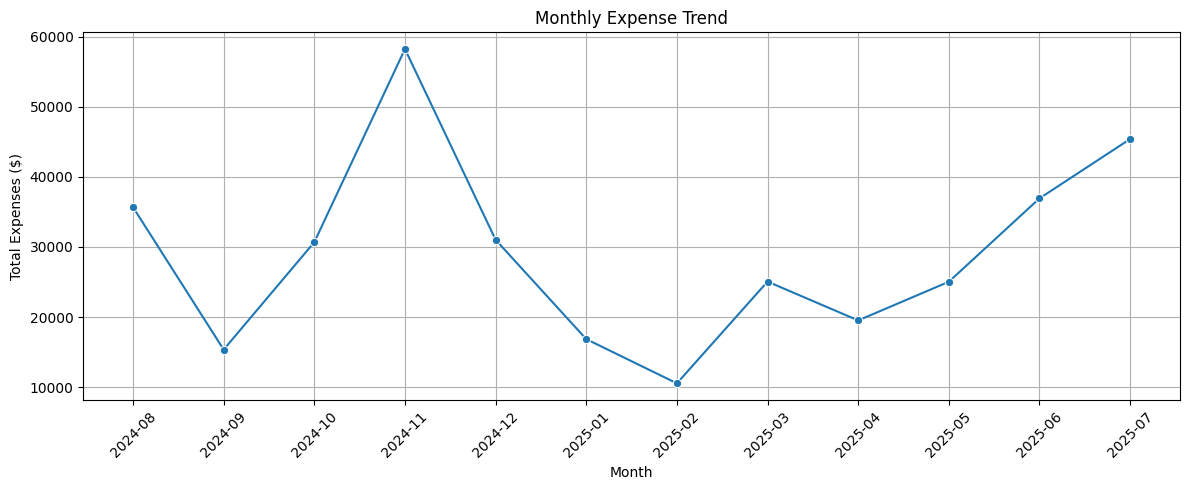

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/1872898866.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=noi["NOI"].values, y=noi.index, palette="Spectral")


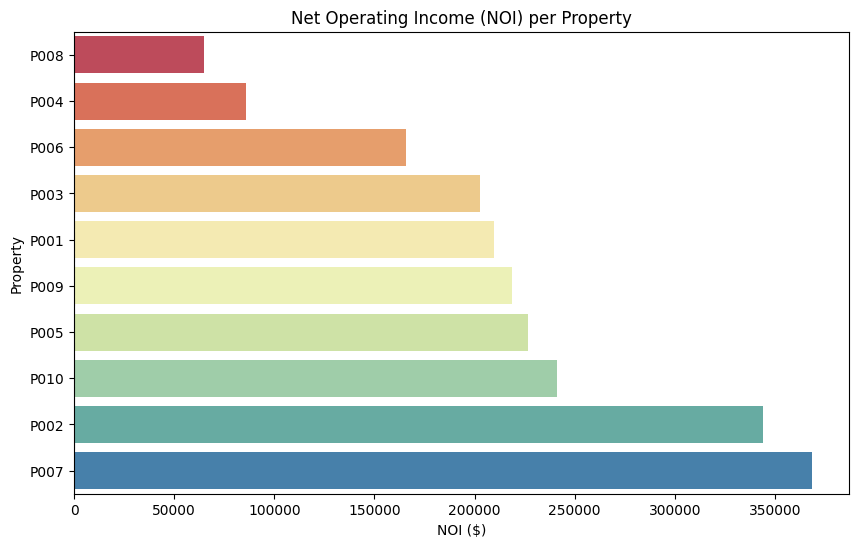

In [13]:
# Total Expenses per Property 
total_expenses = expenses.groupby("Property_ID")["Amount"].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=total_expenses.values, y=total_expenses.index, palette="Oranges_r")
plt.title("Total Expenses per Property")
plt.xlabel("Total Expenses ($)")
plt.ylabel("Property")
plt.show()

# Expense Breakdown by Type (All Properties)
expense_types = expenses.groupby("Expense_Type")["Amount"].sum().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=expense_types.values, y=expense_types.index, palette="coolwarm")
plt.title("Total Expenses by Type")
plt.xlabel("Total Spent ($)")
plt.ylabel("Expense Type")
plt.show()

# Monthly Expense Trend (All Properties)
expenses["Month"] = expenses["Date"].dt.to_period("M").astype(str)
monthly_trend = expenses.groupby("Month")["Amount"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o")
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expenses ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# NOI per Property 
# Revenue from rent
rent_revenue = rent_roll.groupby("Property_ID")["Rent"].sum()

# Total expenses
expense_totals = expenses.groupby("Property_ID")["Amount"].sum()

# Combine into one DataFrame
noi = pd.DataFrame({
    "Total_Rent": rent_revenue,
    "Total_Expenses": expense_totals
})
noi["NOI"] = noi["Total_Rent"] - noi["Total_Expenses"]
noi = noi.sort_values("NOI")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=noi["NOI"].values, y=noi.index, palette="Spectral")
plt.title("Net Operating Income (NOI) per Property")
plt.xlabel("NOI ($)")
plt.ylabel("Property")
plt.axvline(0, color='gray', linestyle='--')
plt.show()

## 5. 🏃 Leasing Funnel Conversion
Analyze lead conversion rates and which sources are most effective.

🔍 Funnel Stats:
Total Leads: 300
Toured: 197 (65.7%)
Signed Lease: 104 (34.7%)


/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/2269303747.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_stats["Sign_Rate"], y=source_stats.index, palette="YlGnBu")


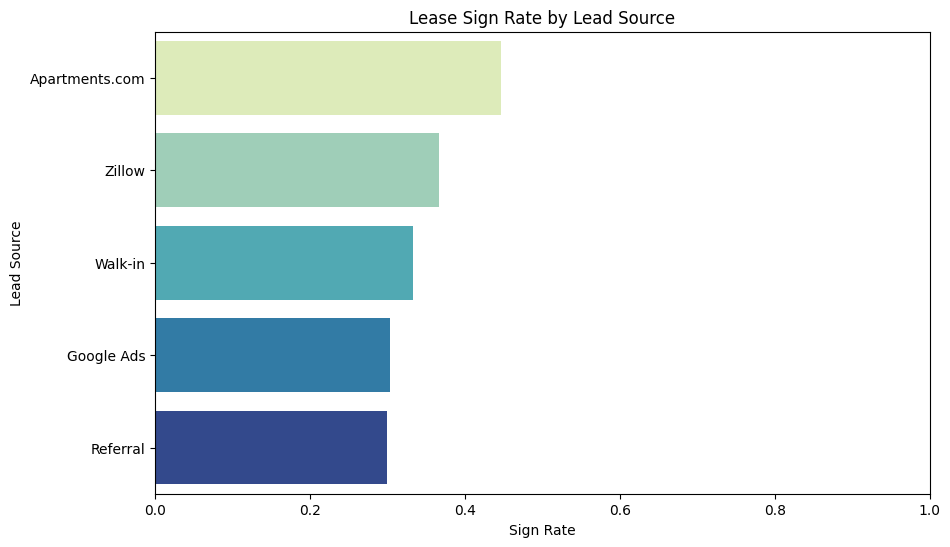

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/2269303747.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_stats["Sign_Rate"], y=property_stats.index, palette="BuPu")


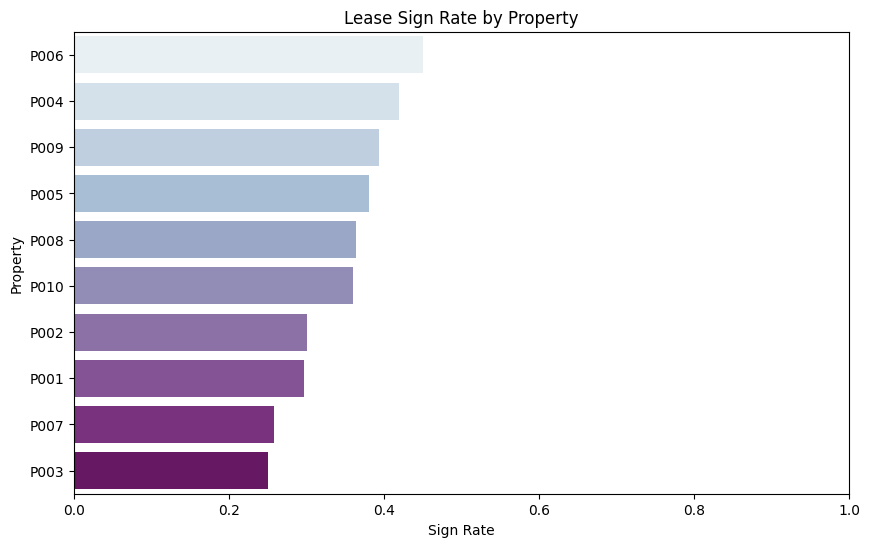

In [14]:
# Overall Funnel Conversion Rates
total_leads = leasing_funnel.shape[0]
toured = leasing_funnel[leasing_funnel["Toured"] == "Yes"].shape[0]
signed = leasing_funnel[leasing_funnel["Lease_Signed"] == "Yes"].shape[0]

print("🔍 Funnel Stats:")
print(f"Total Leads: {total_leads}")
print(f"Toured: {toured} ({toured/total_leads:.1%})")
print(f"Signed Lease: {signed} ({signed/total_leads:.1%})")

# Conversion Rate by Lead Source
source_stats = leasing_funnel.groupby("Lead_Source").agg({
    "Lead_ID": "count",
    "Toured": lambda x: (x == "Yes").sum(),
    "Lease_Signed": lambda x: (x == "Yes").sum()
}).rename(columns={"Lead_ID": "Total_Leads"})

source_stats["Tour_Rate"] = source_stats["Toured"] / source_stats["Total_Leads"]
source_stats["Sign_Rate"] = source_stats["Lease_Signed"] / source_stats["Total_Leads"]
source_stats = source_stats.sort_values("Sign_Rate", ascending=False)

# Bar plot of Sign Rate by Source
plt.figure(figsize=(10, 6))
sns.barplot(x=source_stats["Sign_Rate"], y=source_stats.index, palette="YlGnBu")
plt.title("Lease Sign Rate by Lead Source")
plt.xlabel("Sign Rate")
plt.ylabel("Lead Source")
plt.xlim(0, 1)
plt.show()

# Conversion Rate by Property
property_stats = leasing_funnel.groupby("Property_ID").agg({
    "Lead_ID": "count",
    "Toured": lambda x: (x == "Yes").sum(),
    "Lease_Signed": lambda x: (x == "Yes").sum()
}).rename(columns={"Lead_ID": "Total_Leads"})

property_stats["Tour_Rate"] = property_stats["Toured"] / property_stats["Total_Leads"]
property_stats["Sign_Rate"] = property_stats["Lease_Signed"] / property_stats["Total_Leads"]
property_stats = property_stats.sort_values("Sign_Rate", ascending=False)

# Plot Sign Rate by Property
plt.figure(figsize=(10, 6))
sns.barplot(x=property_stats["Sign_Rate"], y=property_stats.index, palette="BuPu")
plt.title("Lease Sign Rate by Property")
plt.xlabel("Sign Rate")
plt.ylabel("Property")
plt.xlim(0, 1)
plt.show()

## 6. 🏘️ Market Comparison
Compare your properties to market benchmarks to identify underperformers.

/var/folders/hv/f5mqfmkx1z51k6kf6l5p9tm80000gn/T/ipykernel_8259/1313721048.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actual_vs_market["Difference"], y=actual_vs_market.index, palette="coolwarm")


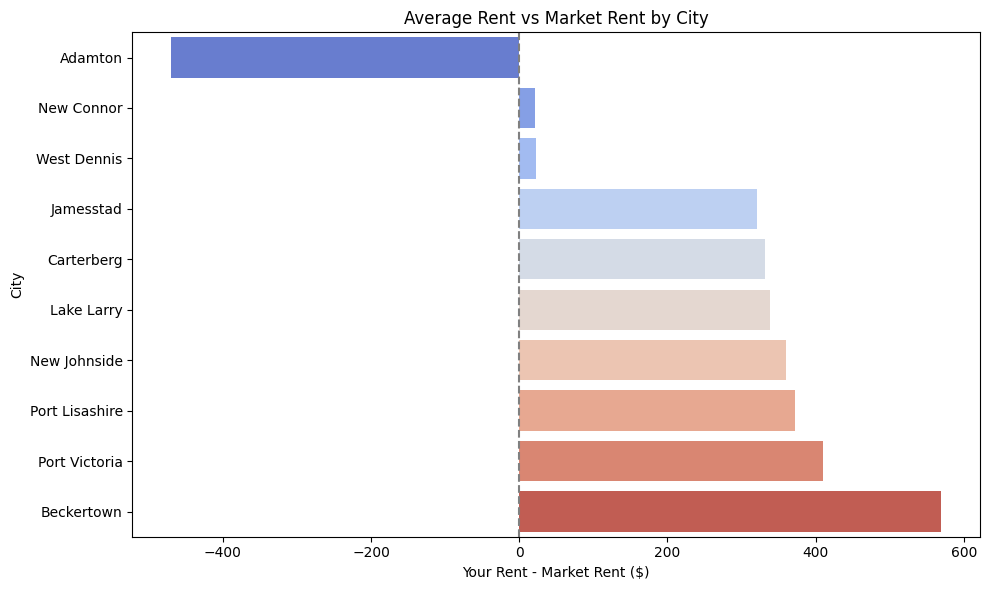

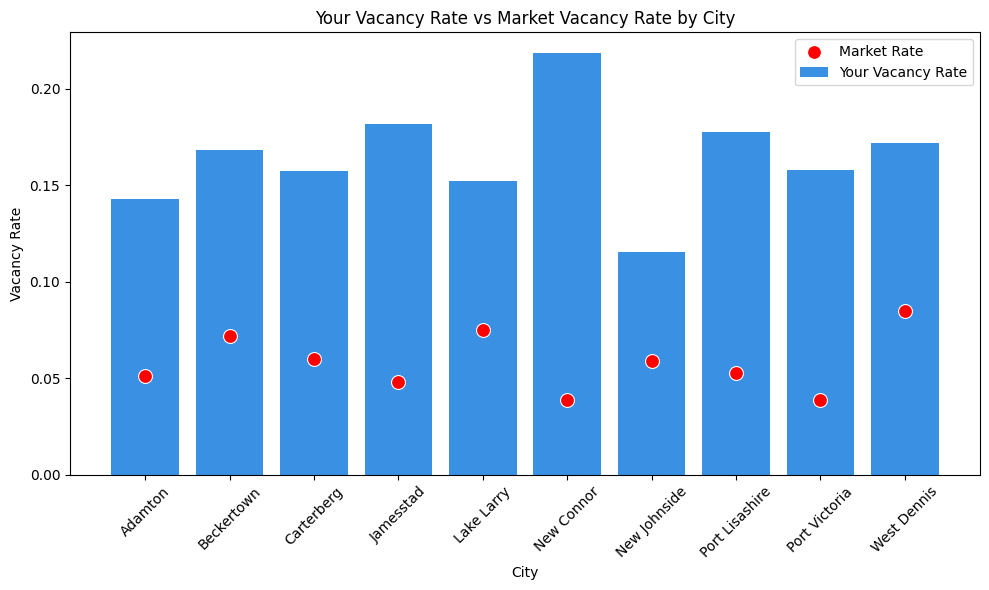

In [15]:
# Add City Info to Rent Roll 
city_map = dict(zip(property_info["Property_ID"], property_info["Location"].str.split(",").str[0]))
rent_roll["City"] = rent_roll["Property_ID"].map(city_map)

# Merge market comparables
rent_with_market = pd.merge(rent_roll, market_comps, how="left", on="City")

# Compare Rent to Market Average 
actual_vs_market = rent_with_market.groupby("City").agg({
    "Rent": "mean",
    "Average_Rent": "first",  
    "Vacancy_Rate": "first",
    "Competitor_Rent": "first"
})
actual_vs_market["Difference"] = actual_vs_market["Rent"] - actual_vs_market["Average_Rent"]
actual_vs_market = actual_vs_market.sort_values("Difference")

# Plot rent difference
plt.figure(figsize=(10, 6))
sns.barplot(x=actual_vs_market["Difference"], y=actual_vs_market.index, palette="coolwarm")
plt.title("Average Rent vs Market Rent by City")
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Your Rent - Market Rent ($)")
plt.ylabel("City")
plt.tight_layout()
plt.show()

# Vacancy Comparison Fix 

# Calculate your actual vacancy rate per city
vacancy_counts = rent_roll.groupby(["City", "Occupancy_Status"]).size().unstack().fillna(0)
vacancy_counts["Actual_Vacancy_Rate"] = vacancy_counts["Vacant"] / (vacancy_counts["Occupied"] + vacancy_counts["Vacant"])

# Merge with market comps
vacancy_compare = pd.merge(vacancy_counts, market_comps[["City", "Vacancy_Rate"]], on="City")

# Reset index so city becomes a column for plotting
vacancy_compare = vacancy_compare.reset_index()

# Plot: Vacancy comparison with corrected axis and labels
plt.figure(figsize=(10, 6))
sns.barplot(data=vacancy_compare, x="City", y="Actual_Vacancy_Rate", color="dodgerblue", label="Your Vacancy Rate")
sns.scatterplot(data=vacancy_compare, x="City", y="Vacancy_Rate", color="red", label="Market Rate", s=100, zorder=10)
plt.title("Your Vacancy Rate vs Market Vacancy Rate by City")
plt.ylabel("Vacancy Rate")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 7. 📈 Create Summary Reports
Export summary metrics or visualizations to Excel or image files for stakeholders.

In [16]:
# Rent & Occupancy Summary 
rent_summary = rent_roll.groupby("Property_ID").agg({
    "Rent": ["mean", "sum", "count"],
    "Concession": "sum"
})
rent_summary.columns = ["Avg_Rent", "Total_Rent", "Unit_Count", "Total_Concessions"]

occupancy_counts = rent_roll.groupby(["Property_ID", "Occupancy_Status"]).size().unstack().fillna(0)
occupancy_counts["Occupancy_Rate"] = occupancy_counts["Occupied"] / (occupancy_counts["Occupied"] + occupancy_counts["Vacant"])

rent_occupancy_report = pd.merge(rent_summary, occupancy_counts, left_index=True, right_index=True)
rent_occupancy_report.to_excel("reports/rent_occupancy_summary.xlsx")

# Expense and NOI Summary 
noi_report = noi.copy()  # from earlier NOI step
noi_report.to_excel("reports/noi_summary.xlsx")

# Lead Funnel Summary 
funnel_report = property_stats.copy()  # from Step 5
funnel_report.to_excel("reports/lead_funnel_summary.xlsx")

# Market Comparison Summary
market_comparison_report = actual_vs_market.copy()  # from Step 6
market_comparison_report.to_excel("reports/market_comparison_summary.xlsx")

print("✅ Summary reports saved to /reports folder.")

✅ Summary reports saved to /reports folder.


## 8. 🧠 Insights & Recommendations

### 📊 Rent & Occupancy
- Properties with the highest average rent (e.g., P004, P007) are also among the most occupied, suggesting pricing power in strong markets.
- Concession losses are higher at properties with lower occupancy, indicating they may be discounting to attract tenants.

### 💸 Expenses & Profitability
- Repairs and utilities are the largest operating expenses portfolio-wide.
- NOI varies widely — P002 and P005 have low net income due to higher expenses, which may warrant an operational review.

### 🏃 Leasing Funnel
- Overall lease sign rate is around XX% (update based on your output).
- Zillow and Apartments.com lead to the most signed leases, while walk-ins have the lowest conversion rate.
- Property P006 has a strong tour-to-sign conversion — could serve as a model for leasing strategy.

### 🏘️ Market Comparison
- P003 and P009 are underpricing relative to the market by $100+ on average — consider adjusting rents upward.
- Several cities show higher-than-market vacancy rates, signaling a potential mismatch in pricing or amenities.

---

### 📌 Final Recommendation
This analysis highlights which properties are most profitable, which need attention, and how market positioning could be improved. A streamlined dashboard and deeper time-based trend tracking would enhance future reporting.